In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from glob import glob
import json

In [3]:
output = glob('./weight_pruning/result/*.json')

In [4]:
output

['./weight_pruning/result/0.02.json',
 './weight_pruning/result/0.03.json',
 './weight_pruning/result/0.05.json',
 './weight_pruning/result/0.1.json',
 './weight_pruning/result/0.15.json',
 './weight_pruning/result/0.25.json',
 './weight_pruning/result/0.5.json',
 './weight_pruning/result/0.6.json',
 './weight_pruning/result/0.8.json',
 './weight_pruning/result/0.9.json']

In [5]:
dic={}

In [6]:
for file_path in output:
    with open(file_path, "r") as json_file:
        json_data = json.load(json_file)
        dic[json_data["result"][0]["percent"]]=json_data["result"][0]

In [7]:
df = pd.DataFrame(dic)

In [8]:
df = df.T

In [9]:
df = df.sort_values(by="percent",ascending=True)

In [10]:
df

,percent,trainset_acc,testset_acc,zero_params,all_params
0.02,0.02,90.564,86.50,5366.0,268500.0
0.03,0.03,90.454,86.14,8050.0,268500.0
0.05,0.05,89.274,84.82,13423.0,268500.0
0.10,0.10,86.478,82.62,26848.0,268500.0
0.15,0.15,85.304,81.17,40272.0,268500.0
0.25,0.25,77.372,75.76,67125.0,268500.0
0.50,0.50,20.542,21.66,134250.0,268500.0
0.60,0.60,12.980,13.70,161098.0,268500.0
0.80,0.80,10.000,10.00,214798.0,268500.0
0.90,0.90,10.000,10.00,241647.0,268500.0


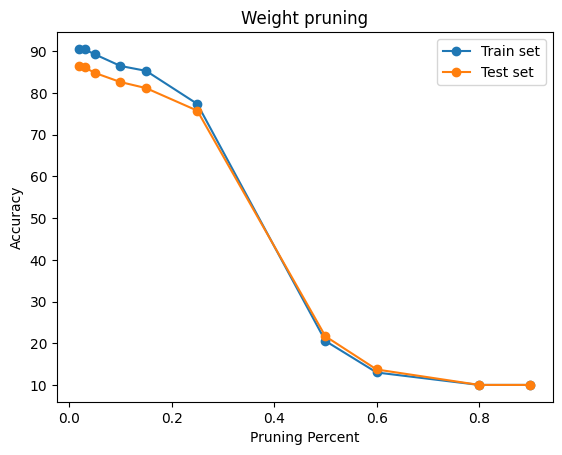

In [11]:
percent = df['percent'].tolist()
trainset_acc = df['trainset_acc'].tolist()
testset_acc = df['testset_acc'].tolist()
plt.plot(percent, trainset_acc, marker='o')
plt.plot(percent, testset_acc, marker='o')
plt.title('Weight pruning')
plt.xlabel('Pruning Percent')
plt.ylabel('Accuracy')
plt.legend(['Train set', 'Test set'])

# 화면에 그래프를 보여줍니다
plt.show()